# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [9]:
# Your code here
import re

def bring(value):
    value = re.findall('\d*\.\d|\d', value)[0]
    return float(value)

In [10]:
fifa['Value'] = fifa['Value'].apply(bring)
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,Left,RF,4.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5,Left
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.0,Right,ST,4.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77,Right
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,Right,LW,5.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5,Right
3,De Gea,27,Spain,91,93,Manchester United,7.0,Right,GK,3.0,...,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72,Right
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.0,Right,RCM,5.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102,Right


In [4]:
# Your code here:

fifa['ValueNumeric'] = fifa['Value'].str.extract(r'(\d+)')
fifa.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102


In [6]:
fifa['ValueNumeric'] = fifa['Value'].str.extract(r'(\d+\.\d+|\d+)')

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [12]:
fifa['Preferred_Foot'] = fifa['Preferred Foot']

In [13]:
fifa.drop(['Preferred Foot'],axis=1)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,Left,RF,4.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5,Left
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.0,Right,ST,4.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77,Right
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,Right,LW,5.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5,Right
3,De Gea,27,Spain,91,93,Manchester United,7.0,Right,GK,3.0,...,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72,Right
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.0,Right,RCM,5.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102,Right


#### Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the C function.

In [19]:
# Your code here:

Position_model = ols('Value ~ C(Position)', data=fifa).fit()
anova_Position = sm.stats.anova_lm(Position_model, typ=2)
anova_Position

,sum_sq,df,F,PR(>F)
C(Position),3124.064159,26.0,7.166335,5.090825e-26
Residual,303813.930473,18120.0,NaN,NaN


In [20]:
Position_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.166
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.09e-26
Time:                        23:53:13   Log-Likelihood:                -51318.
No. Observations:               18147   AIC:                         1.027e+05
Df Residuals:                   18120   BIC:                         1.029e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4363      0.132     33.534      0.000       4.177       4.696
C(Position)[T.CB]     -0.4649      0.164     -2.833      0.005      -0.787      -0.143
C(Position)[T.CDM]    -0.1576      0.188     -0.840      0.401      -0.525       0.210
C(Position)[T.CF]      0.4299      0.494      0.870      0.384      -0.538       1.398
C(Position)[T.CM]     -0.3378      0.172     -1.966      0.049      -0.675      -0.001
C(Position)[T.GK]     -0.6375      0.161     -3.970      0.000      -0.952      -0.323
C(Position)[T.LAM]     2.4399      0.903      2.701      0.007       0.669       4.210
C(Position)[T.LB]     -0.4214      0.174     -2.426      0.015      -0.762      -0.081
C(Position)[T.LCB]     0.0134      0.208      0.064      0.949      -0.395       0.422
C(Position)[T.LCM]     0.9216      0.245      3.764      0.000       0.442       1.402
C(Position)[T.LDM]     0.1501      0.294      0.510      0.610      -0.426       0.727
C(Position)[T.LF]      2.4903      1.065      2.337      0.019       0.402       4.579
C(Position)[T.LM]     -0.0906      0.181     -0.500      0.617      -0.446       0.264
C(Position)[T.LS]      0.3511      0.314      1.119      0.263      -0.264       0.966
C(Position)[T.LW]      0.4529      0.248      1.826      0.068      -0.033       0.939
C(Position)[T.LWB]    -0.4479      0.482     -0.929      0.353      -1.393       0.497
C(Position)[T.RAM]     1.7875      0.903      1.979      0.048       0.017       3.558
C(Position)[T.RB]     -0.3582      0.175     -2.051      0.040      -0.700      -0.016
C(Position)[T.RCB]    -0.1339      0.207     -0.647      0.518      -0.540       0.272
C(Position)[T.RCM]     0.5302      0.246      2.158      0.031       0.049       1.012
C(Position)[T.RDM]     0.0713      0.292      0.245      0.807      -0.500       0.643
C(Position)[T.RF]      6.4574      1.032      6.256      0.000       4.434       8.481
C(Position)[T.RM]      0.1022      0.180      0.568      0.570      -0.251       0.455
C(Position)[T.RS]      0.4425      0.316      1.399      0.162      -0.178       1.063
C(Position)[T.RW]      0.5139      0.251      2.051      0.040       0.023       1.005
C(Position)[T.RWB]    -0.1340      0.459     -0.292      0.770      -1.033       0.765
C(Position)[T.ST]     -0.1837      0.159     -1.155      0.248      -0.495       0.128
==============================================================================
Omnibus:                    23678.599   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9527252.942
Skew:                           7.053   Prob(JB):                         0.00
Kurtosis:                     114.360   Cond. No.                         36.7
==============================================================================

In [21]:
Preferred_Foot_model = ols('Value ~ C(Preferred_Foot)', data=fifa).fit()
anova_Preferred_Foot = sm.stats.anova_lm(Preferred_Foot_model, typ=2)
anova_Preferred_Foot


,sum_sq,df,F,PR(>F)
C(Preferred_Foot),58.227277,1.0,3.44264,0.06355
Residual,307099.358840,18157.0,NaN,NaN


In [22]:
Preferred_Foot_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.443
Date:                Sun, 06 Oct 2019   Prob (F-statistic):             0.0636
Time:                        23:53:16   Log-Likelihood:                -51443.
No. Observations:               18159   AIC:                         1.029e+05
Df Residuals:                   18157   BIC:                         1.029e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.3794      0.063     69.102      0.000       4.255       4.504
C(Preferred_Foot)[T.Right]    -0.1342      0.072     -1.855      0.064      -0.276       0.008
==============================================================================
Omnibus:                    24082.911   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10515080.013
Skew:                           7.251   Prob(JB):                         0.00
Kurtosis:                     119.992   Cond. No.                         3.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What is your conclusion from this ANOVA?

As theory ANOVA compares the difference in variation between the groups and the difference in variation within the groups themselves. However I am not sure of how to interpret the table.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [25]:
# Your code here:
Nationality_model = ols('Value ~ C(Nationality)', data=fifa).fit()
anova_Nationality = sm.stats.anova_lm(Nationality_model, typ=2)

anova_Nationality


,sum_sq,df,F,PR(>F)
C(Nationality),7559.396795,163.0,2.791884,6.548459e-29
Residual,299716.713645,18043.0,NaN,NaN


### What is your conclusion from this ANOVA?

· same as before

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [26]:
# Your code here:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
Preferred_Foot     48
dtype: int64

In [27]:
fifa = fifa.dropna()
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
Preferred_Foot    0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [28]:
# Your code here:

from scipy.stats import linregress

X = sm.add_constant(fifa['Stamina'])

X.head()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,SprintSpeed,Stamina
0,1.0,86.0,72.0
1,1.0,91.0,88.0
2,1.0,90.0,81.0
3,1.0,58.0,43.0
4,1.0,76.0,90.0


In [29]:
Y = fifa['SprintSpeed']
Y.head()


0    86.0
1    91.0
2    90.0
3    58.0
4    76.0
Name: SprintSpeed, dtype: float64

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [30]:
y = fifa['Value']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     156.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.01e-68
Time:                        00:08:35   Log-Likelihood:                -50595.
No. Observations:               17918   AIC:                         1.012e+05
Df Residuals:                   17915   BIC:                         1.012e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8892      0.146     12.944      0.000       1.603       2.175
SprintSpeed     0.0139      0.003      5.249      0.000       0.009       0.019
Stamina         0.0245      0.002     10.028      0.000       0.020       0.029
==============================================================================
Omnibus:                    23877.037   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10724823.264
Skew:                           7.309   Prob(JB):                         0.00
Kurtosis:                     121.960   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [43]:
# Your code here:
import statsmodels.api as sm
X = sm.add_constant(fifa[['Potential']]) # adding a constant
Y = fifa['Value']


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1513.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):          7.84e-318
Time:                        00:25:21   Log-Likelihood:                -50024.
No. Observations:               17918   AIC:                         1.001e+05
Df Residuals:                   17916   BIC:                         1.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9826      0.344    -26.143      0.000      -9.656      -8.309
Potential      0.1867      0.005     38.899      0.000       0.177       0.196
==============================================================================
Omnibus:                    22947.455   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9737897.192
Skew:                           6.771   Prob(JB):                         0.00
Kurtosis:                     116.402   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

##### Your conclusions here:

Comparing both models, the first ones the linear regresion is very small meanining that the capture of the variatin in the data is 17%, the slope is significantly differebt to zero. Compared to the second one whichn the linear regression is bigger, 78%. 



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

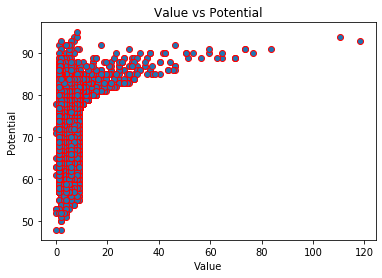

In [42]:
# Your code here:

import matplotlib.pyplot as plt

Value = fifa['Value']
Potential = fifa['Potential']

plt.scatter(Value, Potential, edgecolors='r')
plt.xlabel('Value')
plt.ylabel('Potential')
plt.title('Value vs Potential')
plt.show()

 Do you see a linear relationship?

In [ ]:
Yes. 